In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나이상 설정할 경우
from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수 - 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 평가함수 - 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류용
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀용
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 시간 측정을 위한모듈
import datetime
# 저장을 위한 모듈
import pickle

### 데이터를 불러온다.

In [3]:
df1 = pd.read_csv('./data/picher_stats_2017.csv')
df1

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [4]:
# 선수명을 제거한다.
df1.drop('선수명', axis=1, inplace=True)
df1

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [5]:
# 팀명은 숫자로 변환한다.
encoder1 = LabelEncoder()
df1['팀명'] = encoder1.fit_transform(df1['팀명'])
df1

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,4,16,7,0,0,0,30,30,190.0,8.95,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,2,11,11,1,0,0,30,29,185.1,7.43,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,0,20,6,0,0,0,31,31,193.1,7.36,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,2,10,7,0,0,0,28,28,175.2,8.04,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,6,13,7,0,0,0,30,30,187.1,7.49,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,8,2,5,0,0,2,33,5,62.2,4.31,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,0,3,2,0,0,0,25,11,59.1,4.85,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,6,0,2,0,0,0,9,2,14.2,4.91,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,7,0,3,0,1,0,41,0,43.2,7.63,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [6]:
# 입력과 결과로 나눈다.
X = df1.drop('연봉(2018)', axis=1)
y = df1['연봉(2018)']

display(X)
display(y)

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,4,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,2,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,0,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,2,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,6,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,8,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,0,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,6,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,7,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

In [7]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[-0.04225053,  3.32457765,  1.23120199, ..., -1.06162315,
         4.51802888,  2.74374569],
       [-0.7977895 ,  2.02618144,  2.51300132, ..., -1.07681252,
         4.10827019,  1.34172411],
       [-1.55332846,  4.36329461,  0.91075216, ..., -0.86922457,
         3.77439273,  5.34750005],
       ...,
       [ 0.71328843, -0.8302902 , -0.37104718, ...,  1.39399038,
        -0.9681847 , -0.02023971],
       [ 1.09105791, -0.8302902 , -0.05059734, ...,  0.71553221,
        -1.03647782, -0.54499636],
       [-1.17555898,  0.20842676,  0.26985249, ...,  1.15096059,
        -1.27170966, -0.54099058]])

In [8]:
# 학습용과 검증용으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

### 기본 모델 사용하기

In [9]:
# KFold 생성
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [10]:
# 사용할 모델들
model1 = KNeighborsRegressor()
model2 = LinearRegression()
model3 = Ridge(random_state=1)
model4 = Lasso(random_state=1)
model5 = ElasticNet(random_state=1)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=1)
model8 = RandomForestRegressor(random_state=1)
model9 = AdaBoostRegressor(random_state=1)
model10 = GradientBoostingRegressor(random_state=1)
model11 = LGBMRegressor(random_state=1)
model12 = XGBRegressor(random_state=1, silent=True, verbosity=0)
model_list1 =[
    ('m1', KNeighborsRegressor()),
    ('m2', LinearRegression()),
    ('m3', Ridge(random_state=1)),
    ('m4', Lasso(random_state=1)),
    ('m5', ElasticNet(random_state=1)),
    ('m6', SVR()),
    ('m7', DecisionTreeRegressor(random_state=1)),
    ('m8', RandomForestRegressor(random_state=1)),
    ('m9', AdaBoostRegressor(random_state=1)),
    ('m10', GradientBoostingRegressor(random_state=1)),
    ('m11', LGBMRegressor(random_state=1)),
    ('m12', XGBRegressor(random_state=1, silent=True, verbosity=0))
]
model13 = VotingRegressor(estimators=model_list1)

In [11]:
# 성능 값을 담을 리스트
score_list = []
# 학습 모델의 이름을 담을 리스트
model_name_list = []
# 최적으로 튜닝된 학습 모델을 담을 리스트
best_model_list = []

In [12]:
# 교차 검증을 수행할 학습 모델 리스트
check_list = [
    model1, model2, model3, model4, model5, model6, model7,
    model8, model9, model10, model11, model12, model13
]
# 모델의 이름
check_name_list = [
    'KNN (Basic)', 'LinearRegression (Basic)', 'Ridge (Basic)',
    'Lasso (Basic)', 'ElasticNet (Basic)', 'SVR (Basic)',
    'DecisionTree (Basic)', 'RandomForest (Basic)', 'AdaBoost (Basic)',
    'GradientBoost (Basic)', 'LGBM (Basic)', 'XGBoost (Basic)',
    'Voting (Basic)'
]

In [13]:
# 교차 검증
for idx, ml in enumerate(check_list) :
    score = cross_val_score(ml, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 출력한다.
    print(f'{check_name_list[idx]} : {score.mean()}')
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 리스트에 담는다.
    score_list.append(score.mean())
    model_name_list.append(check_name_list[idx])
    best_model_list.append(ml)

KNN (Basic) : -307088324.3636364
LinearRegression (Basic) : -171824372.1231905
Ridge (Basic) : -159340462.80652934
Lasso (Basic) : -168119633.04137146
ElasticNet (Basic) : -232783651.2530888
SVR (Basic) : -1292223619.684923
DecisionTree (Basic) : -436421145.4545455
RandomForest (Basic) : -243748405.84181818
AdaBoost (Basic) : -298629670.3271635
GradientBoost (Basic) : -330459989.38265675
LGBM (Basic) : -375689197.046872
XGBoost (Basic) : -282133590.31798
Voting (Basic) : -225905191.11697465


### 하이퍼 파라미터 튜닝

In [14]:
# 튜닝하기 위해 사용할 파라미터 후보 값
parameter_list = [
    # KNN
    {
        # 확인할 주변 이웃의 개수
        'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # LinearRegression
    # LinearRegression은 튜닝할 하이퍼 파라미터가 없다.
    # Ridge
    {
        # 규제의 강도
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
    },
    # Lasso
    {
        # 규제의 강도
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
    },
    # ElElasticNet
    {
        # 규제의 강도
        'alpha' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
    },
    # SVR (규제의 종류를 l2만 사용한다.)
    {
        # 규제의 강도
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # DecisionTree
    {
        # 생성될 최대 질문 깊이. None은 무한대
        'max_depth' :[None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # GradientBoost
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # LGBM
    {
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # XGBoost
    {
        # 내부에서 사용할 알고리즘 종류(gbtree : 결정트리, gblinear : 선형모델)
        'booster' : ['gbtree', 'gblinear'],
        # 학습률
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        # 사용할 학습 모델의 개수
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
]

In [15]:
# 사용할 모델들
model1 = KNeighborsRegressor()
model3 = Ridge(random_state=1)
model4 = Lasso(random_state=1)
model5 = ElasticNet(random_state=1)
model6 = SVR()
model7 = DecisionTreeRegressor(random_state=1)
model8 = RandomForestRegressor(random_state=1)
model9 = AdaBoostRegressor(random_state=1)
model10 = GradientBoostingRegressor(random_state=1)
model11 = LGBMRegressor(random_state=1)
model12 = XGBRegressor(random_state=1, silent=True, verbosity=0)

In [16]:
# 교차 검증을 수행할 학습 모델 리스트
check_list = [
    model1, model3, model4, model5, model6, model7,
    model8, model9, model10, model11, model12
]
# 모델의 이름
check_name_list = [
    'KNN (Tuning)', 'Ridge (Tuning)',
    'Lasso (Tuning)', 'ElasticNet (Tuning)', 'SVR (Tuning)',
    'DecisionTree (Tuning)', 'RandomForest (Tuning)', 'AdaBoost (Tuning)',
    'GradientBoost (Tuning)', 'LGBM (Tuning)', 'XGBoost (Tuning)',
]

In [17]:
# 하이퍼 파라미터 튜닝
for idx, ml in enumerate(check_list) :
    grid1 = GridSearchCV(ml, param_grid=parameter_list[idx], scoring='neg_mean_squared_error', cv=kfold)
    grid1.fit(X_train, y_train)
    
    # 현재 알고리즘의 이름과 평가 점수의 평균을 리스트에 담는다.
    score_list.append(grid1.best_score_)
    model_name_list.append(check_name_list[idx])
    best_model_list.append(grid1.best_estimator_)
    
    print(f'{check_name_list[idx]} : {grid1.best_score_}')
    print(grid1.best_params_)

KNN (Tuning) : -262822043.18181816
{'n_neighbors': 2}
Ridge (Tuning) : -159340462.80652934
{'alpha': 1}
Lasso (Tuning) : -153827894.19536078
{'alpha': 1000}
ElasticNet (Tuning) : -156638116.69589657
{'alpha': 0.1}
SVR (Tuning) : -646093275.189878
{'C': 10000}
DecisionTree (Tuning) : -323313621.88369554
{'max_depth': 10}
RandomForest (Tuning) : -239744454.44666672
{'n_estimators': 300}
AdaBoost (Tuning) : -269917922.58602977
{'learning_rate': 0.1, 'n_estimators': 50}
GradientBoost (Tuning) : -312155988.8574258
{'learning_rate': 0.01, 'n_estimators': 300}
LGBM (Tuning) : -375689197.046872
{'learning_rate': 0.1, 'n_estimators': 100}
XGBoost (Tuning) : -152453291.01737168
{'booster': 'gblinear', 'learning_rate': 0.1, 'n_estimators': 100}


In [18]:
model_list1 =[
    ('m1', best_model_list[13]),
    ('m2', best_model_list[14]),
    ('m3', best_model_list[15]),
    ('m4', best_model_list[16]),
    ('m5', best_model_list[17]),
    ('m6', best_model_list[18]),
    ('m7', best_model_list[19]),
    ('m8', best_model_list[20]),
    ('m9', best_model_list[21]),
    ('m10', best_model_list[22]),
    ('m11', best_model_list[23]),
]
model13 = VotingRegressor(estimators=model_list1)

In [19]:
# 튜닝된 모델로 구성된 보팅 모델들을 교차 검증한다.
score1 = cross_val_score(model13, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)

score_list.append(score1.mean())

model_name_list.append('Voting (Tuning)')

best_model_list.append(model13)

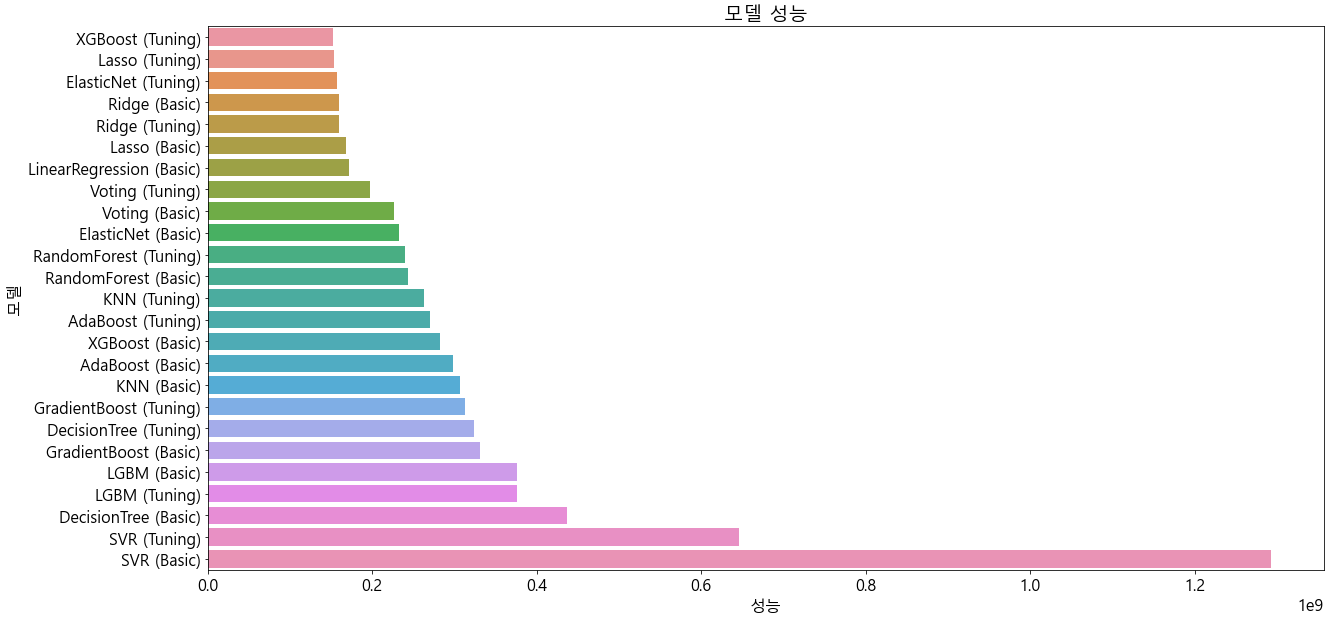

In [20]:
# 결과를 시각화한다.
d1 = {
    'model_name' : model_name_list,
    'score' : score_list
}

result_df = pd.DataFrame(d1)
result_df['score'] = abs(result_df['score'])
result_df.sort_values(by='score', inplace=True)

sns.barplot(data=result_df, x='score', y='model_name')
plt.title('모델 성능')
plt.xlabel('성능')
plt.ylabel('모델')
plt.show()

In [21]:
# 각 모델로 부터 검증 데이터에 대한 평가를 실시한다.
# 전체 모델을 X_train으로 학습을 진행한다.
for ml in best_model_list :
    ml.fit(X_train, y_train)

In [22]:
# 검증 데이터를 통해 예측 결과를 가져온다.
predict_list = []

for ml in best_model_list :
    pred = ml.predict(X_test)
    predict_list.append(pred)

In [23]:
# r2를 측정해본다.
accuray_list = []

for pred in predict_list :
    r1 = r2_score(pred, y_test)
    accuray_list.append(r1)

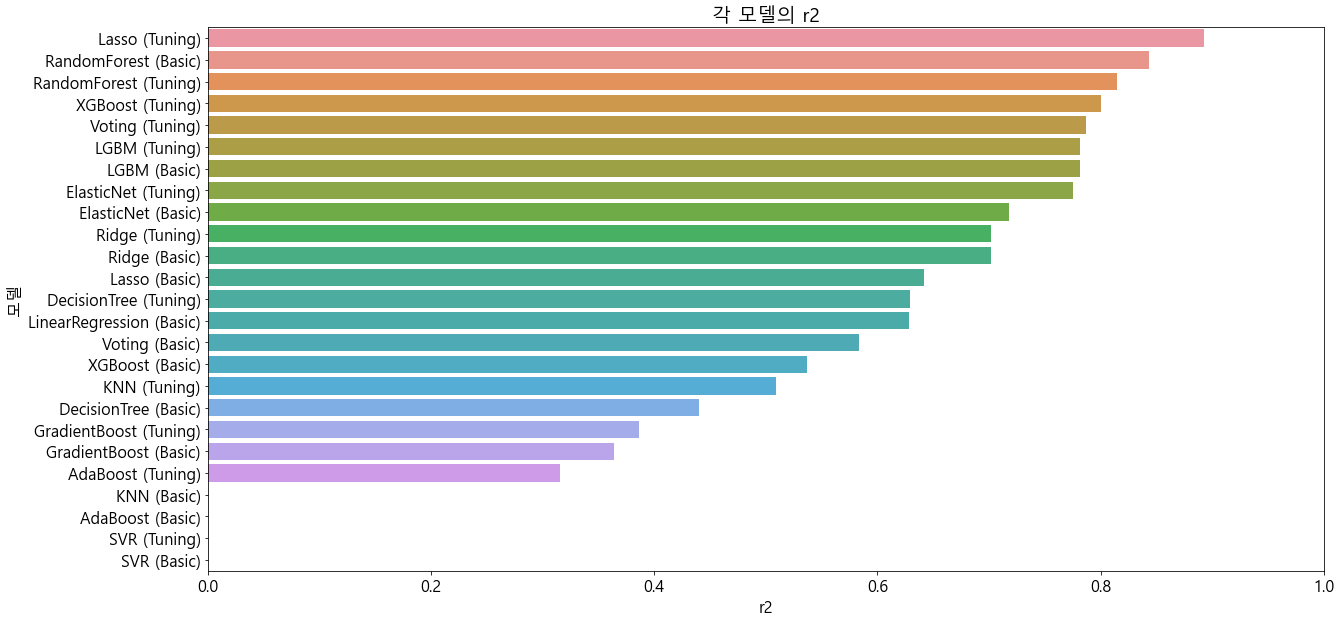

In [28]:
# 정확도를 시각화한다.
d100 = {
    'model_name' : model_name_list,
    'r2' : accuray_list
}

df100 = pd.DataFrame(d100)
df100.sort_values(by='r2', ascending=False, inplace=True)

sns.barplot(data=df100, x='r2', y='model_name')
plt.title('각 모델의 r2')
plt.xlabel('r2')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

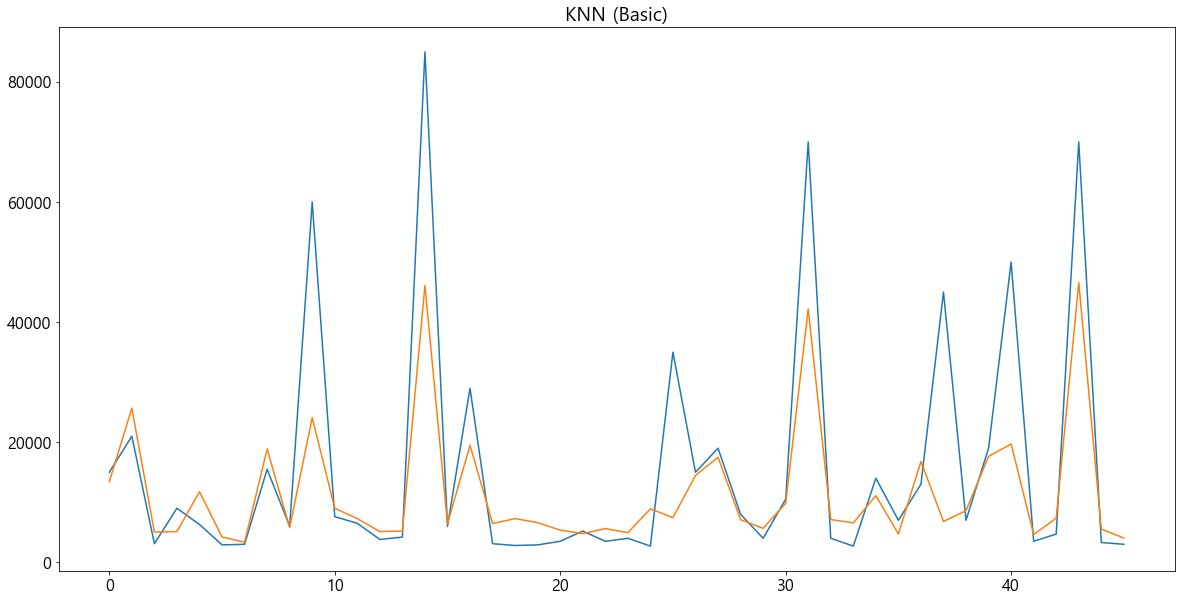

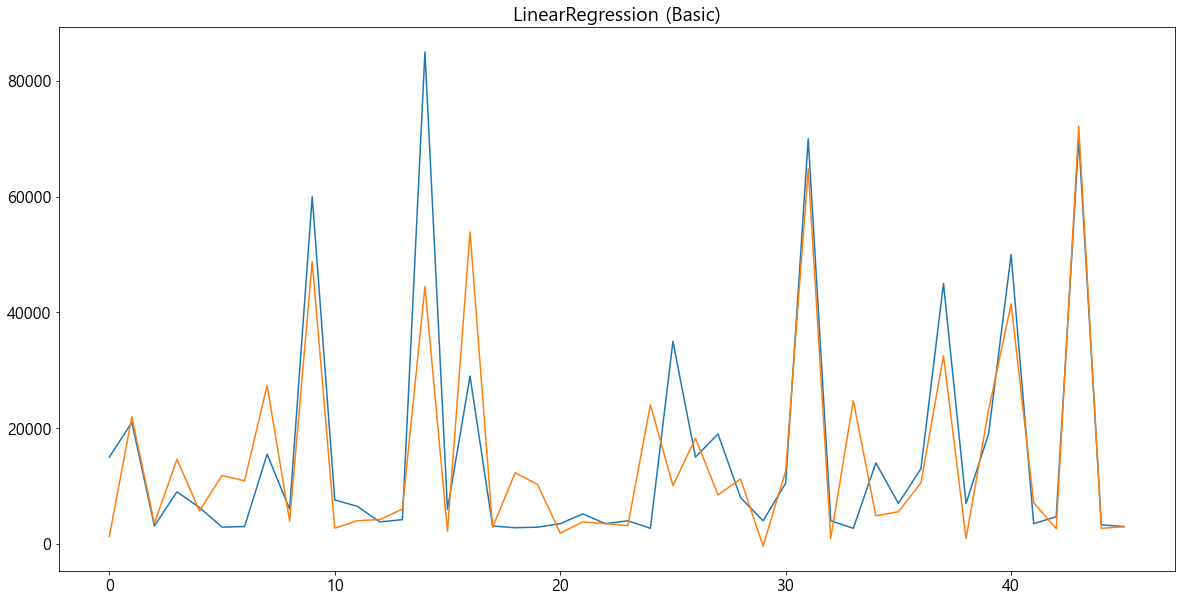

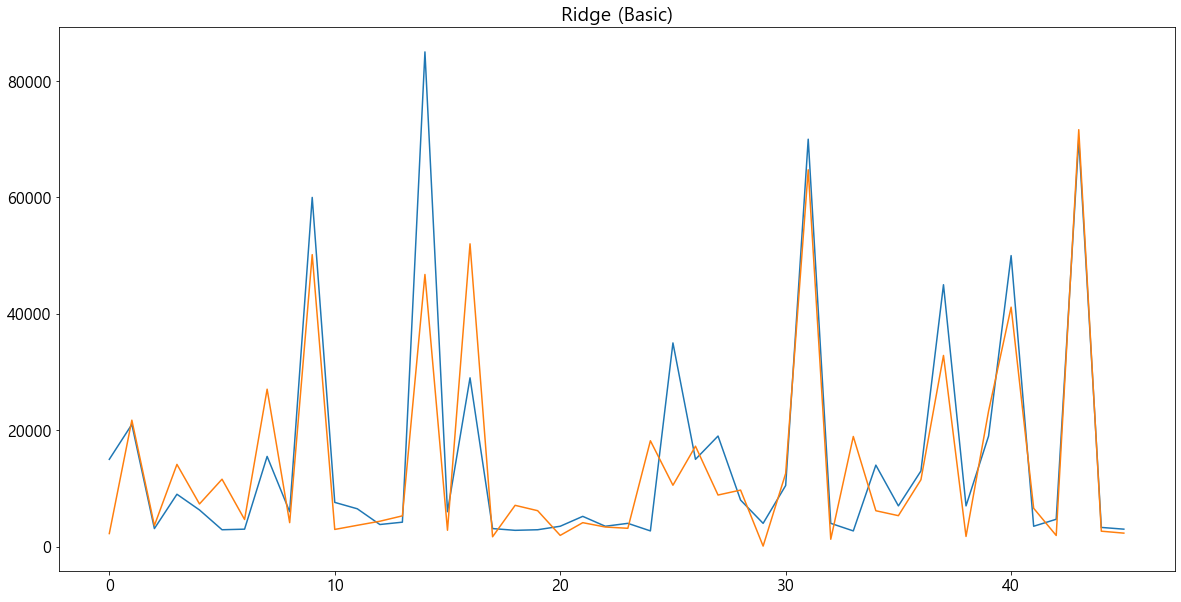

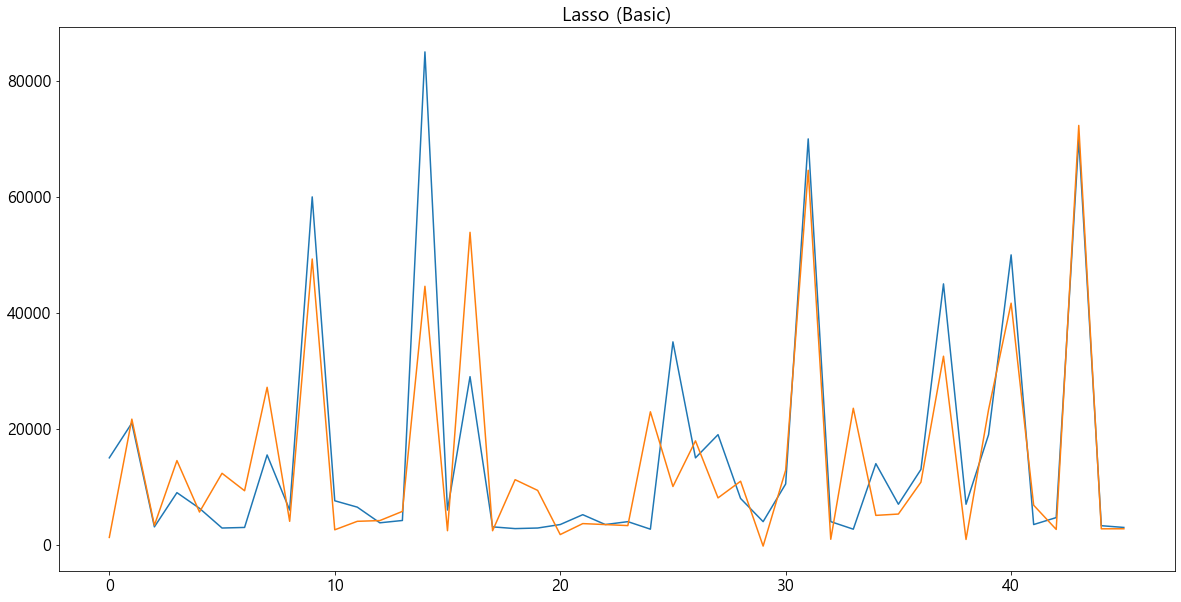

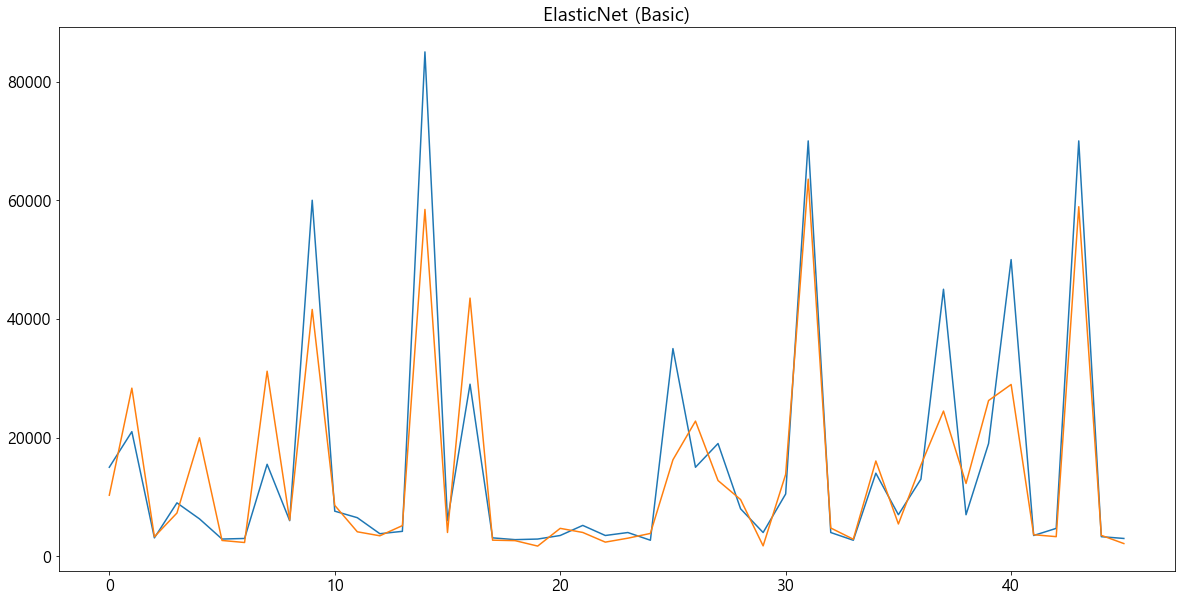

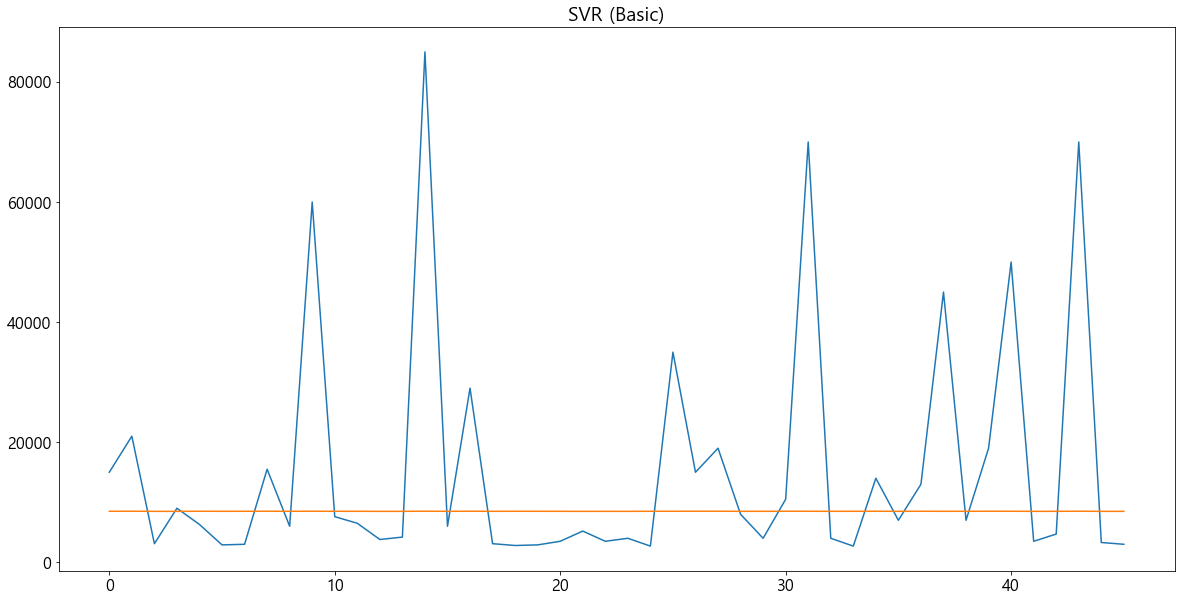

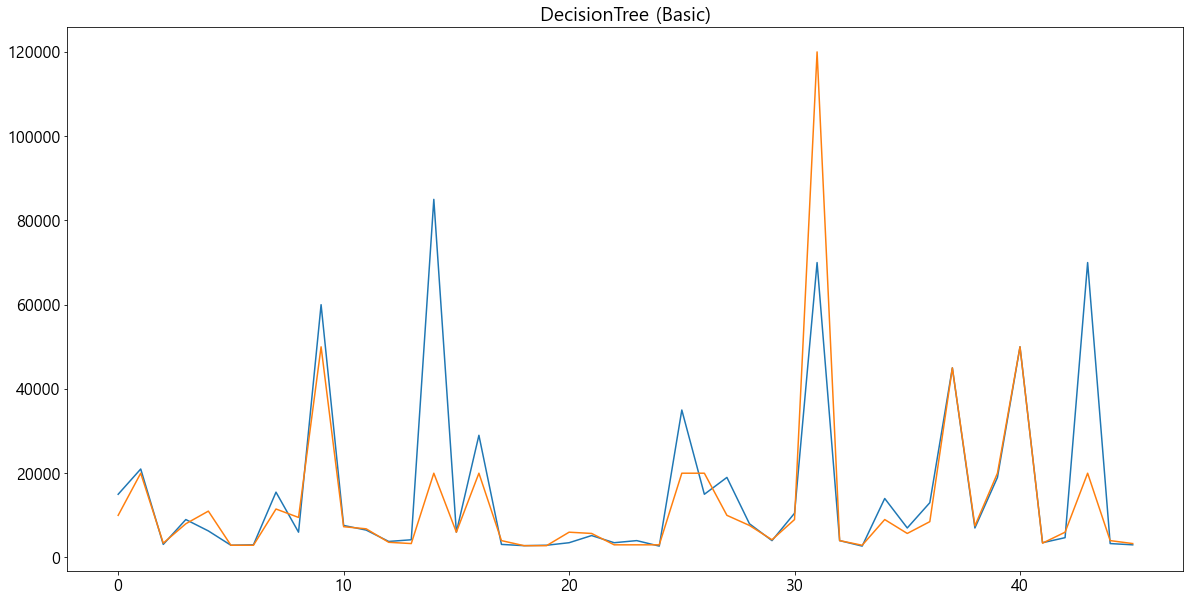

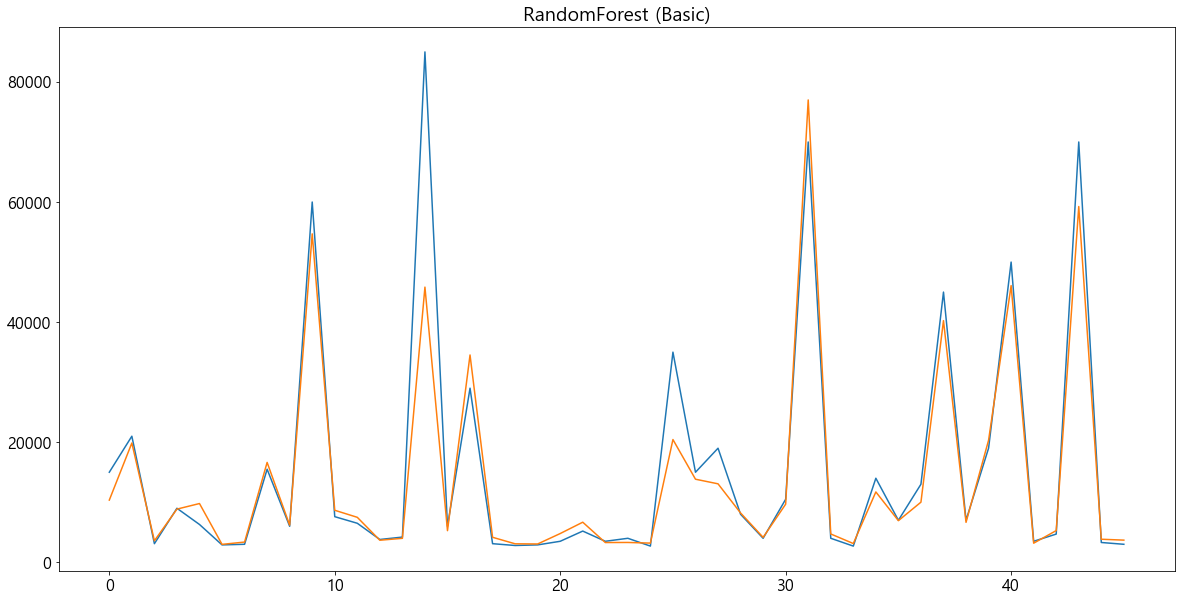

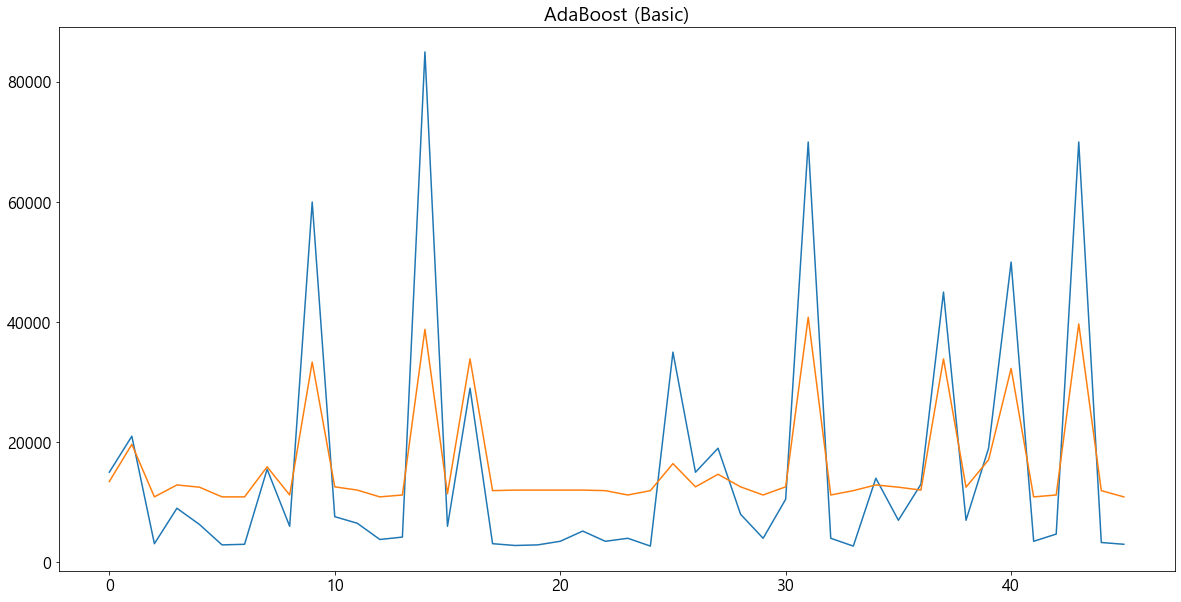

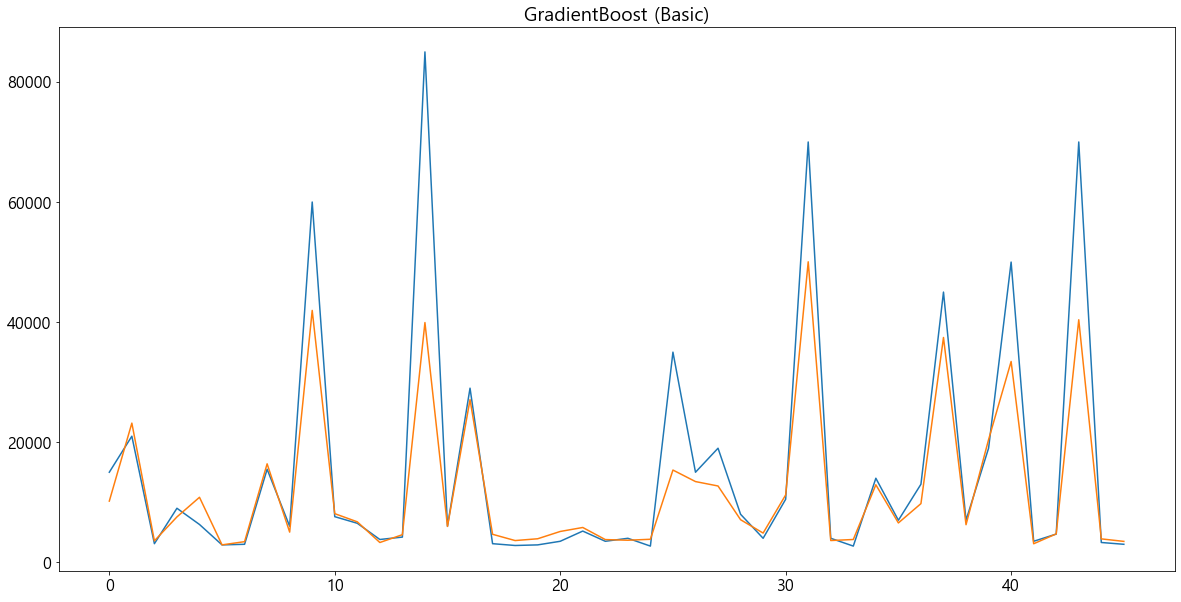

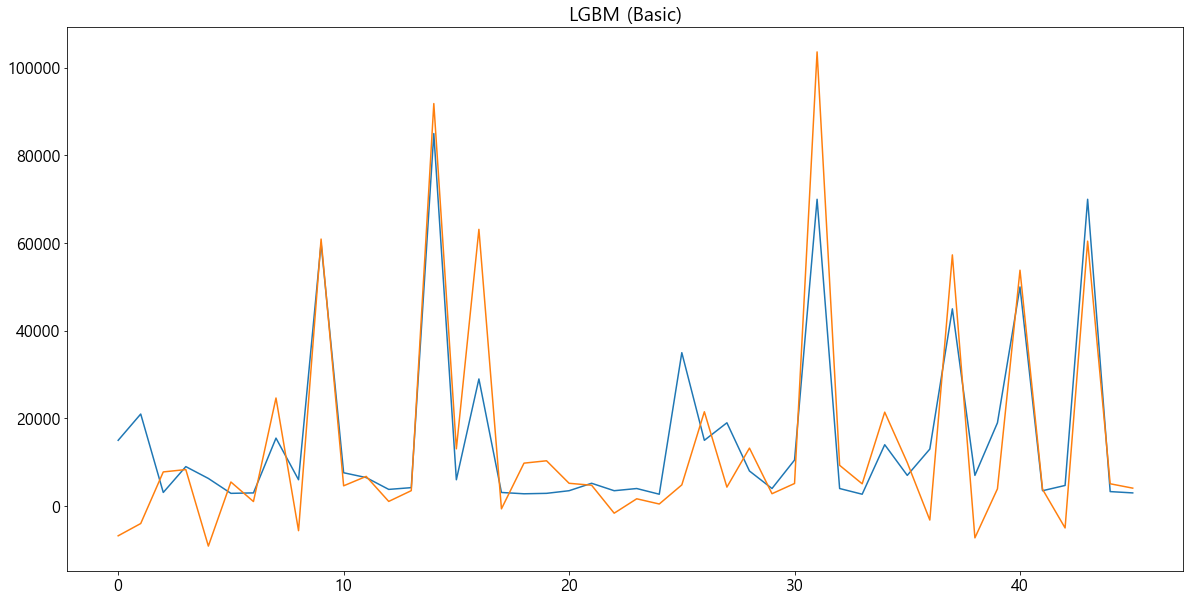

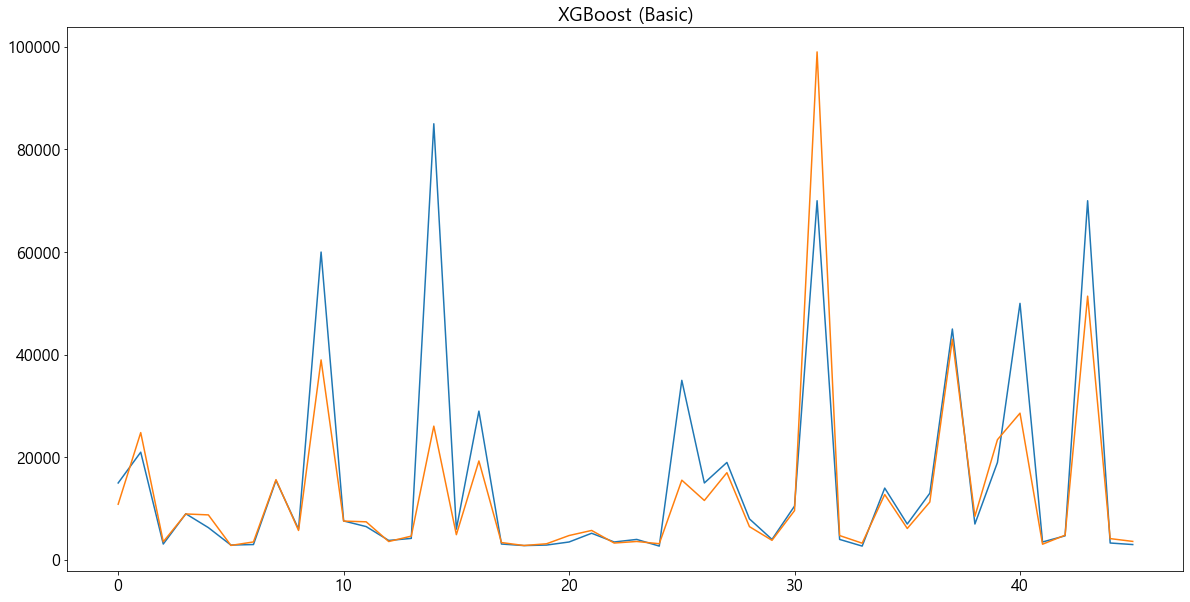

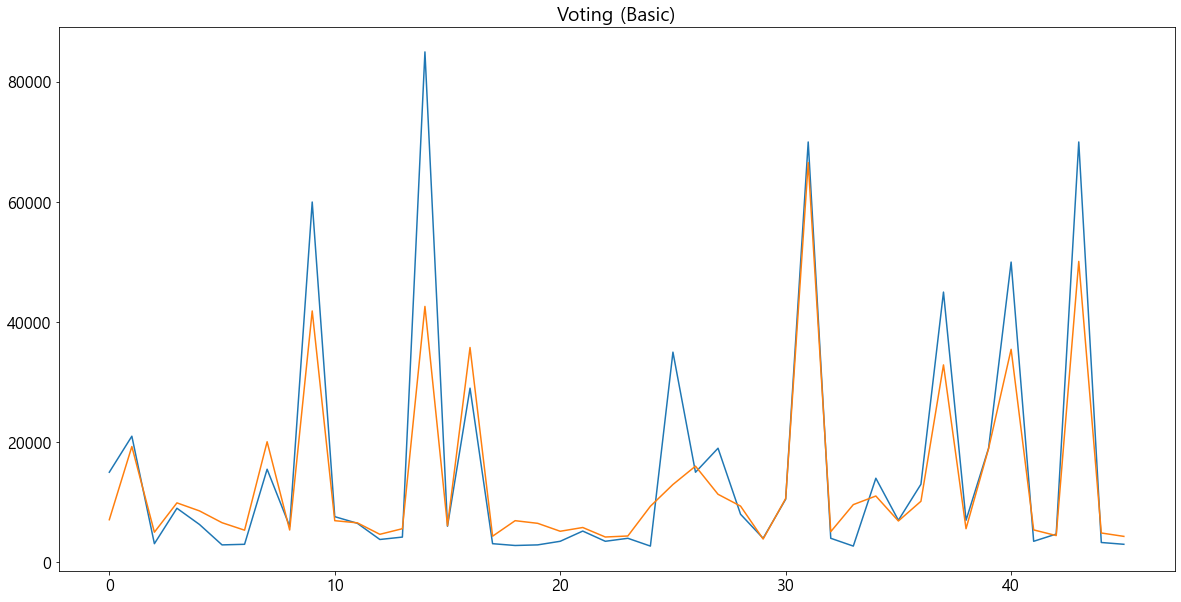

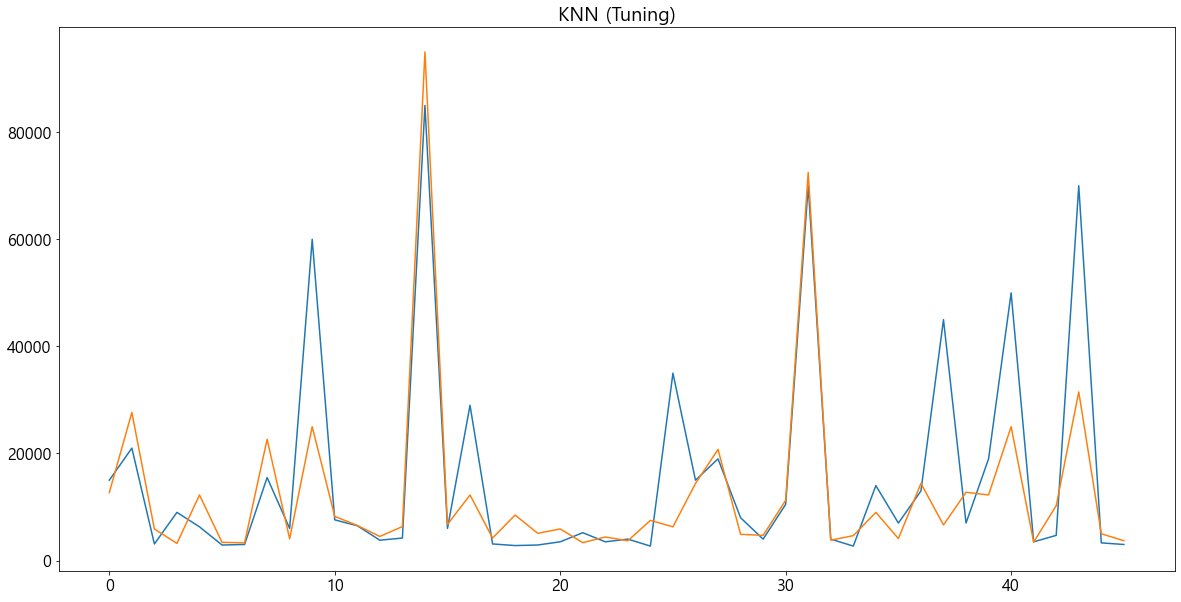

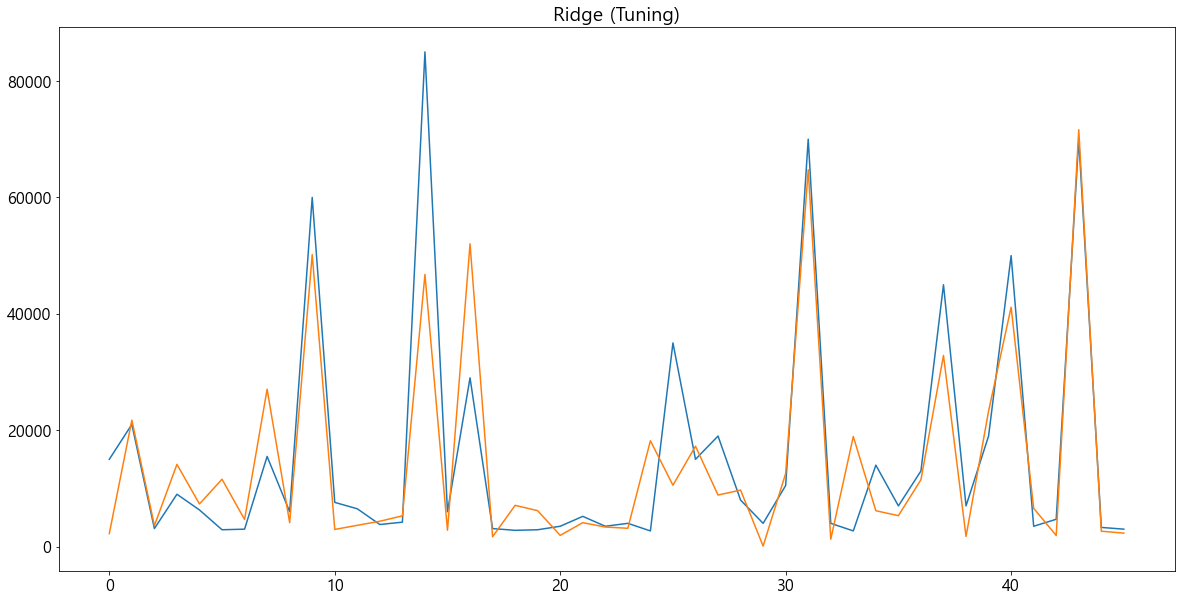

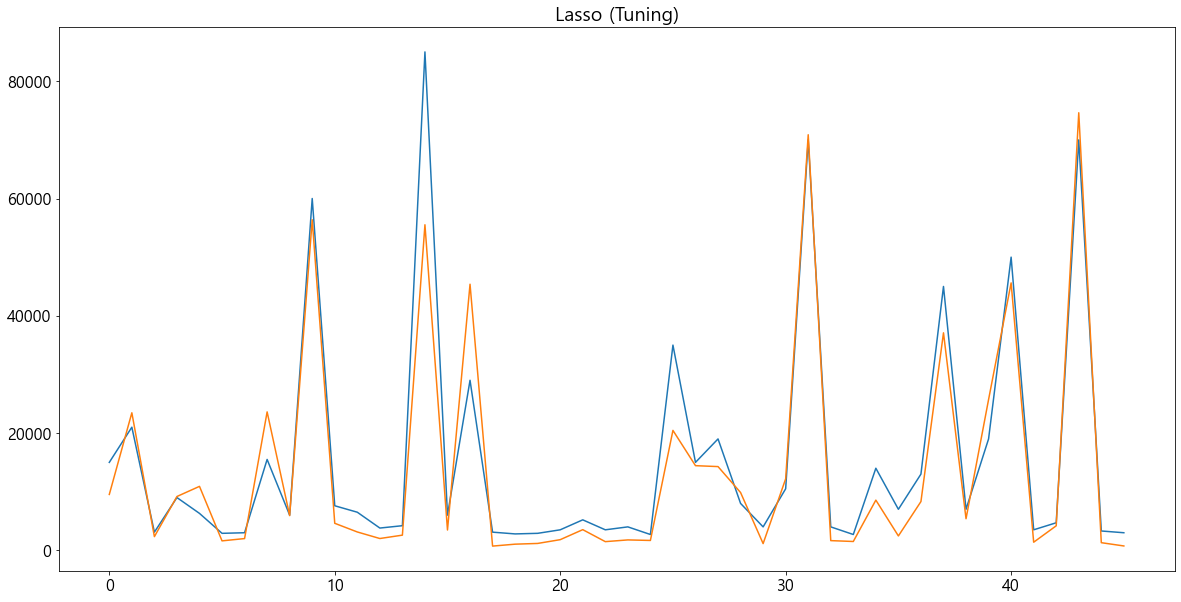

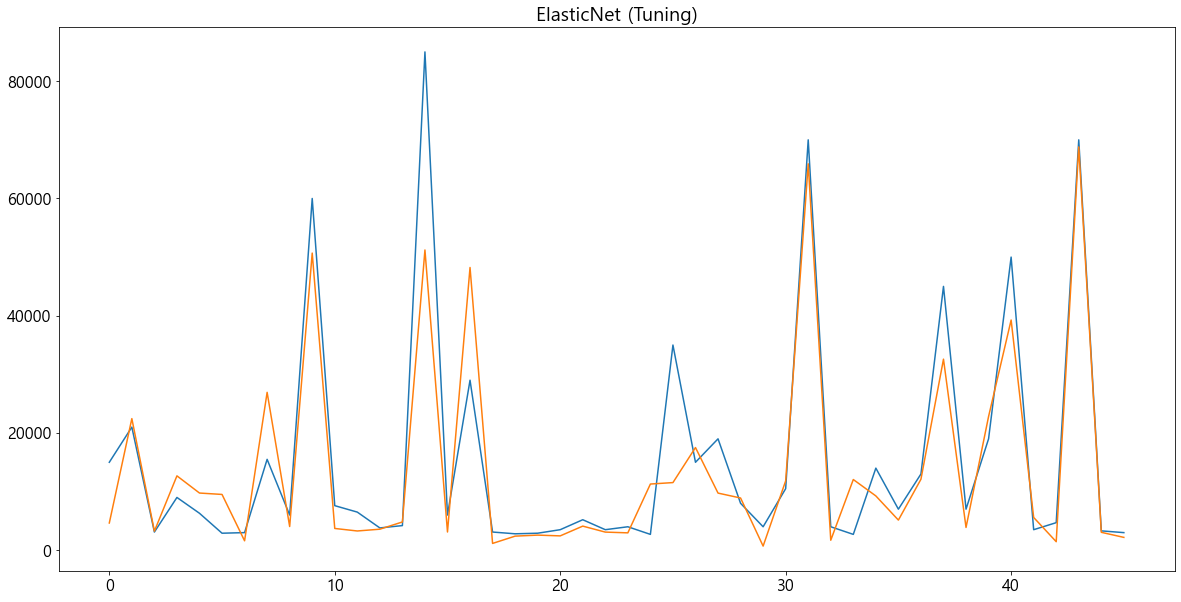

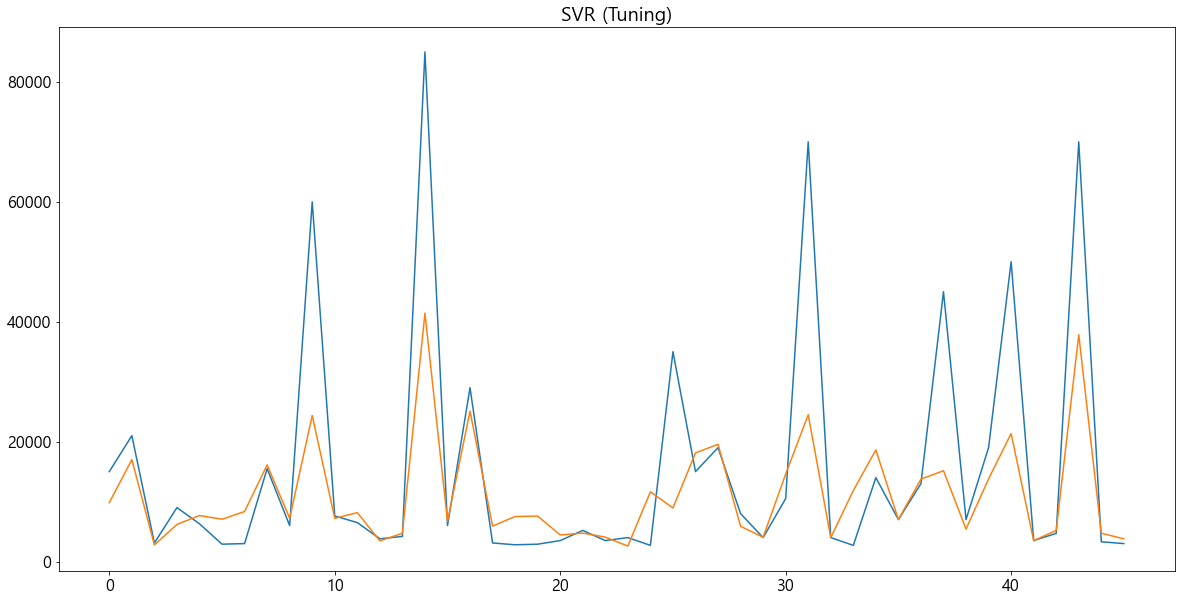

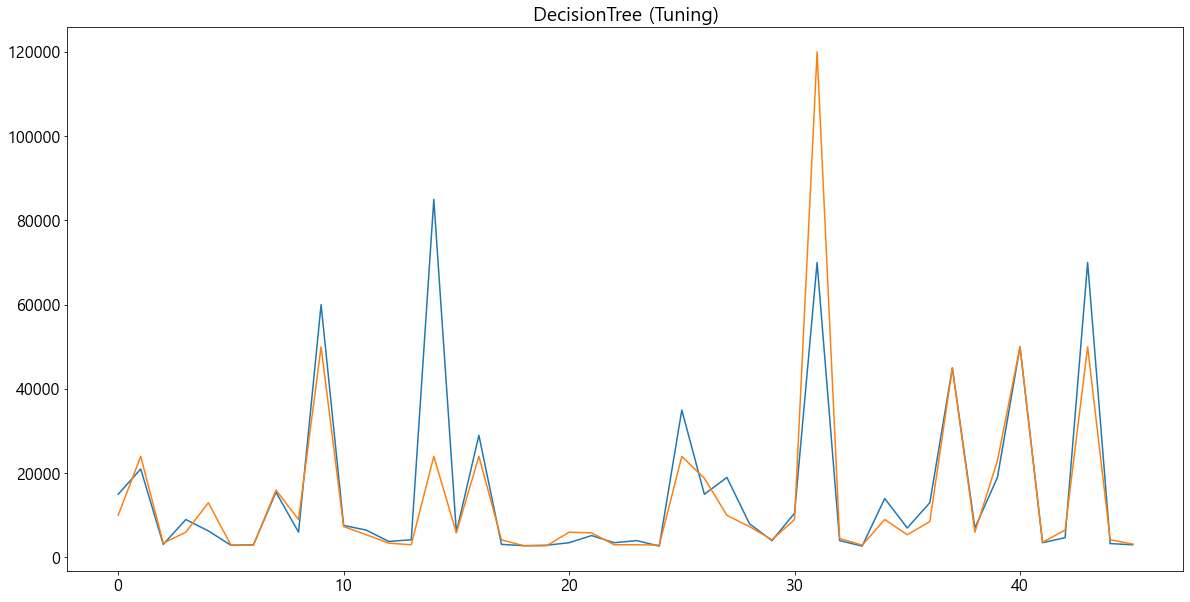

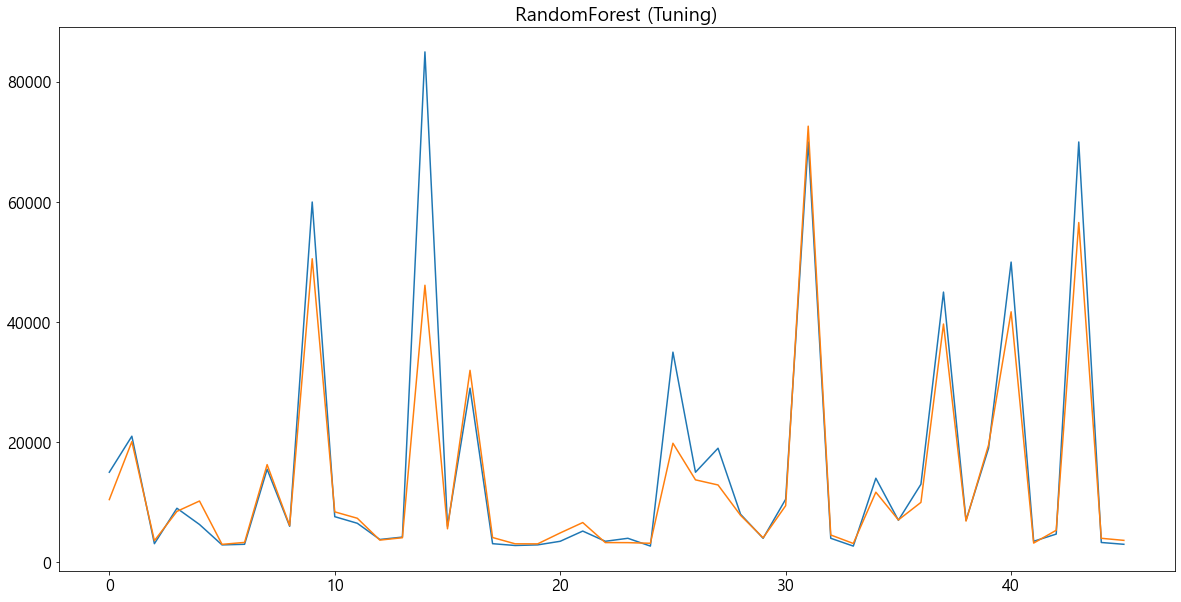

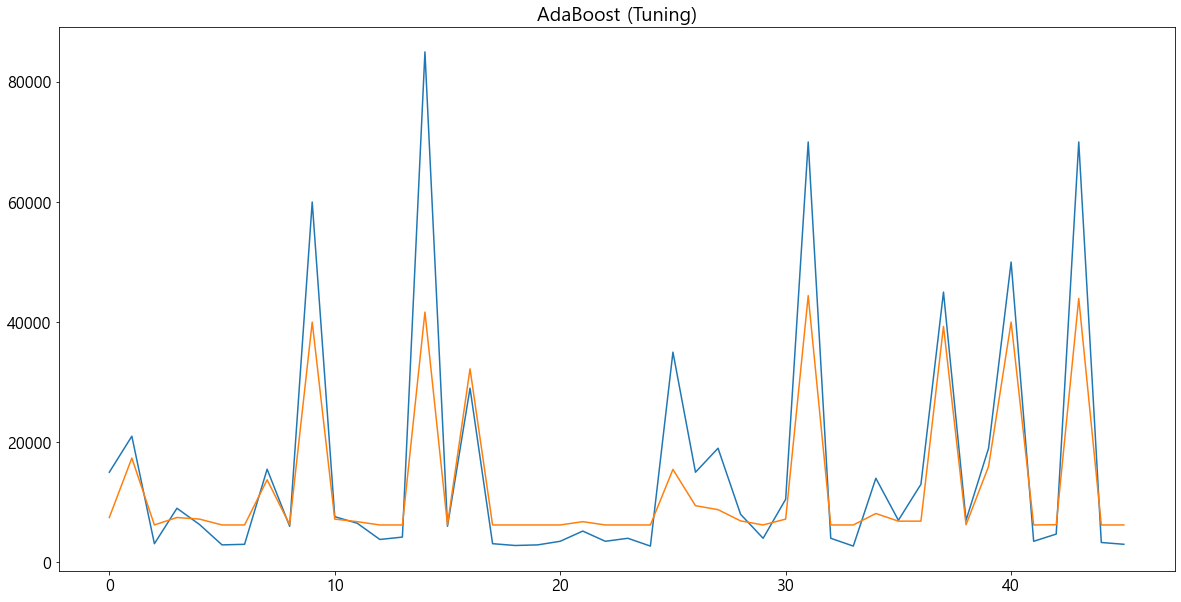

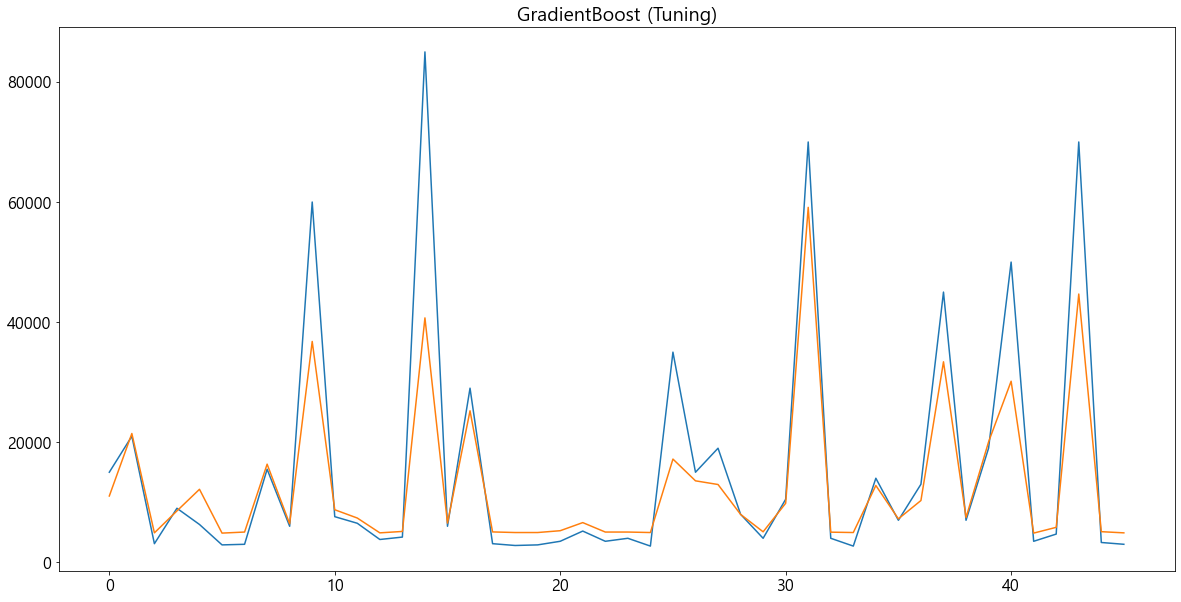

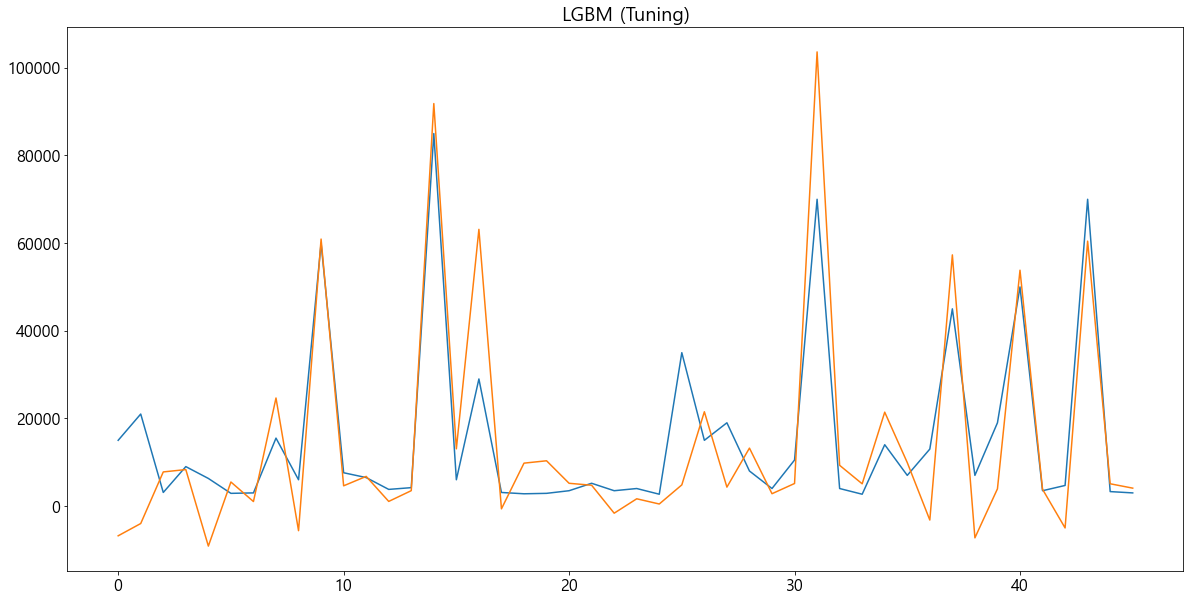

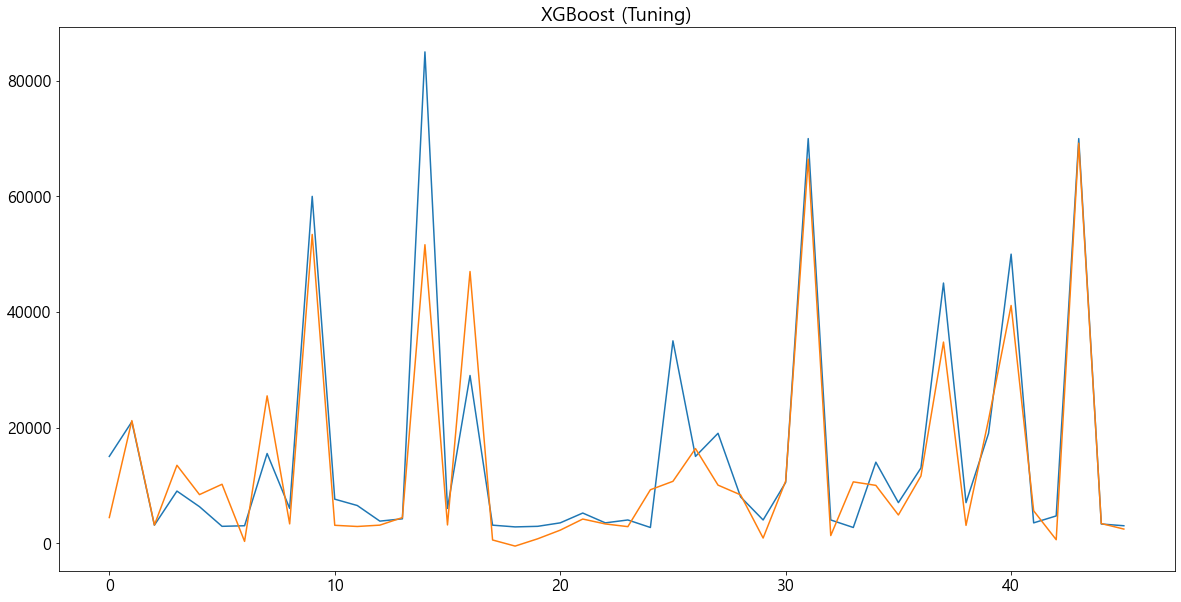

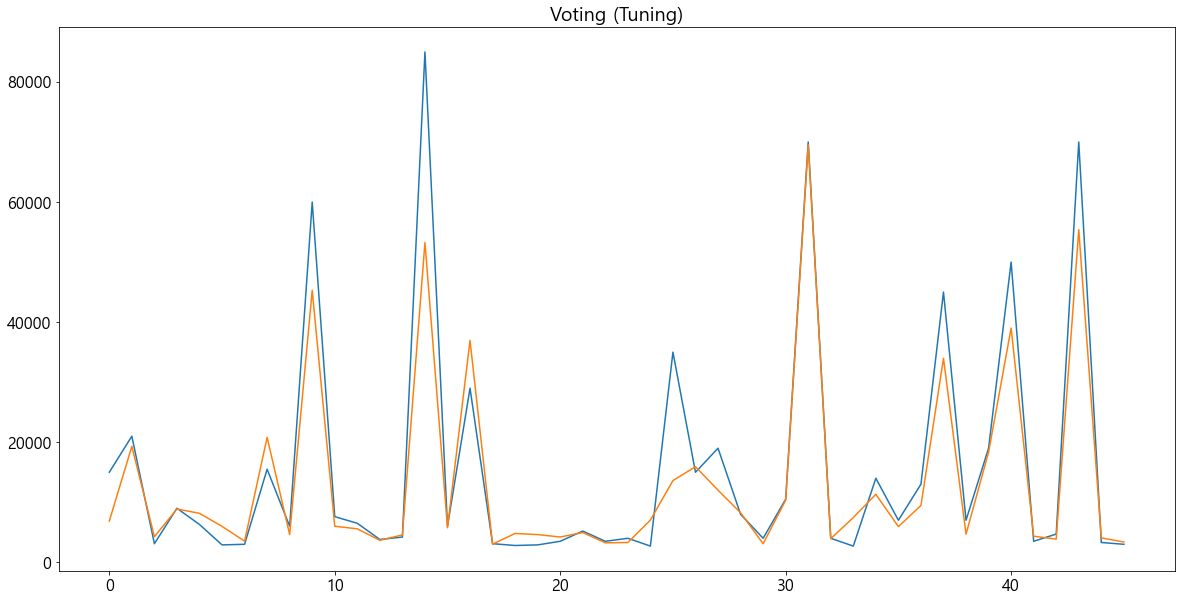

In [25]:
# 진짜 결과와 예측 결과의 패턴을 비교한다.
for idx, pred in enumerate(predict_list):
    plt.plot(y_test.values, label='원본')
    plt.plot(pred, label='예측')
    plt.title(model_name_list[idx])
    plt.show()